In [2]:
import os
import torch

In [3]:
import clip
from PIL import Image

In [3]:
print(torch.__version__)

2.3.1


In [4]:
"cuda" if torch.cuda.is_available() else "cpu"

'cuda'

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [6]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [5]:
def generate_clip_embeddings(image_folder):
    embeddings = {}
    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)
        
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            continue
        image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
        with torch.no_grad():
            image_features = model.encode_image(image)
        image_features /= image_features.norm(dim=-1, keepdim=True)
        embeddings[image_name] = image_features.cpu().numpy()
    
    return embeddings
image_folder = 'D:/C_Drive/Desktop/CS/clip-image-test/test'
embeddings = generate_clip_embeddings(image_folder)

c:\Users\gunub\.conda\envs\clip-image\lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


In [19]:
# First element of the dictionary
list(embeddings.keys())[0] , (list(embeddings.values())[0]).shape

('image_ (1).png', (1, 512))

In [ ]:
import pickle
with open('image_embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings, f)


In [3]:
#Load pkl file and see contents
with open('test/image_embeddings.pkl', 'rb') as f:
    embeddings = pickle.load(f)

In [4]:
embeddings.keys()

dict_keys(['image_ (100).png', 'image_ (39).png', 'image_ (40).png', 'image_ (41).png', 'image_ (42).png', 'image_ (43).png', 'image_ (44).png', 'image_ (45).png', 'image_ (46).png', 'image_ (47).png', 'image_ (48).png', 'image_ (49).png', 'image_ (50).png', 'image_ (51).png', 'image_ (52).png', 'image_ (53).png', 'image_ (54).png', 'image_ (55).png', 'image_ (56).png', 'image_ (57).png', 'image_ (58).png', 'image_ (59).png', 'image_ (60).png', 'image_ (61).png', 'image_ (62).png', 'image_ (63).png', 'image_ (64).png', 'image_ (65).png', 'image_ (66).png', 'image_ (67).png', 'image_ (68).png', 'image_ (69).png', 'image_ (70).png', 'image_ (71).png', 'image_ (72).png', 'image_ (73).png', 'image_ (74).png', 'image_ (75).png', 'image_ (76).png', 'image_ (77).png', 'image_ (78).png', 'image_ (79).png', 'image_ (80).png', 'image_ (81).png', 'image_ (82).png', 'image_ (83).png', 'image_ (84).png', 'image_ (85).png', 'image_ (86).png', 'image_ (87).png', 'image_ (88).png', 'image_ (89).png', 

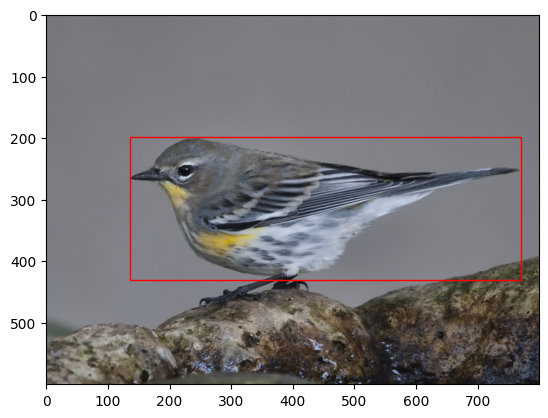

In [10]:
# 

In [2]:
# read text file from given path and plot bounding box on image , text file is of the format : <class> <relative_left> <relative_top> <relative_width> <relative_height>
def read_text_file(image_path, text_file_path):
    image = Image.open(image_path)
    with open(text_file_path, 'r') as file:
        for line in file:
            class_name, relative_left, relative_top, relative_width, relative_height = line.split()
            relative_left, relative_top, relative_width, relative_height = float(relative_left), float(relative_top), float(relative_width), float(relative_height)
            width, height = image.size
            left, top = int(relative_left*width), int(relative_top*height)
            right, bottom = int((relative_left+relative_width)*width), int((relative_top+relative_height)*height)
            image = image.crop((left, top, right, bottom))
    return image

image_path = 'D:/C_Drive/Pictures/IIITD Dataset/data/images/train/0a1ca019b257473d902de7c2d1c10ccf.jpg'
text_file_path = 'D:/C_Drive/Pictures/IIITD Dataset/data/labels/train/0a1ca019b257473d902de7c2d1c10ccf.txt'
image = read_text_file(image_path, text_file_path) 
image.show()
